### THIS NOTEBOOK FOLLOWS THE INSTRUCTIONS PROVIDED IN https://colab.research.google.com/drive/1yn-8wglDenRLa9GSpYOtJ6gu8wR-kWNz#scrollTo=Dm9yYI5_Y3iz

In [155]:
# %pip install mistralai evaluate
import time
import json
from mistralai import Mistral
import os
from bert_score import score
import pandas as pd
with open('API_KEY.txt', 'r') as file:
    API_KEY = file.read().strip()
client = Mistral(api_key = API_KEY)

manually collected data into reviews and offers

In [25]:
reviews = {
    # Thermal Mugs
    "Thermal Mugs" : ["Keeps my coffee hot for hours—just what I need for long workdays. Thanks, Contigo.",
    "The lid isn’t leak-proof, but it keeps drinks warm for a decent amount of time.",
    "Love the sleek design of my Zojirushi mug, and it fits perfectly in my car cup holder!",
    "It’s lightweight but keeps my drinks at the right temperature for hours with Hydro Flask.",
    "No more cold coffee! This Yeti thermal mug does the job.",
    "It’s easy to clean, and the thermal insulation works like a charm.",
    "The handle makes it easy to carry, and it doesn’t spill.",
    "Not great for keeping drinks cold, but excellent for hot beverages.",
    "I wish it were bigger, but it’s perfect for my morning tea.",
    "I accidentally dropped it, and it didn’t dent! Very sturdy.",
    "The rubber seal around the lid came loose after a few weeks. Disappointing.",
    "Great for both coffee and soup—keeps them warm for hours.",
    "The exterior stays cool, even when my drink is piping hot inside.",
    "I love the color options, and it’s great for on-the-go.",
    "Keeps ice water cold for hours, even in hot weather!",
    "It’s a little tricky to open one-handed, but overall, a great mug.",
    "The size is perfect for travel, and it keeps drinks hot all day.",
    "It doesn’t leak, even when I toss it in my bag. Highly recommend Contigo.",
    "The lid is a little tight, but the mug works well for keeping drinks warm.",
    "Very stylish and functional! I get compliments all the time.",
    "Keeps my coffee scalding hot for longer than any mug I’ve owned with Zojirushi.",
    "Great value for the price. Works just as well as more expensive brands.",
    "The mug is lightweight and easy to carry around.",
    "It fits perfectly under my single-serve coffee machine!",
    "Durable, sleek, and it does exactly what it’s supposed to.",],

    # Dishwasher Detergents
    "Dishwasher Detergents" : ["My dishes come out sparkling clean every time with Cascade. Love this detergent!",
    "It works well on glass, but I’ve noticed spots on my silverware.",
    "Great for tough, greasy messes. Leaves no residue! Thanks, Finish.",
    "This detergent smells amazing and leaves my dishwasher fresh.",
    "It’s a little pricey, but my dishes have never looked better with Cascade Platinum.",
    "Gets rid of even the most stubborn baked-on food. Highly recommend Finish Quantum.",
    "Not the best on hard water stains, but otherwise it works great.",
    "My dishes have never been so spotless after a wash!",
    "It’s very effective, but I wish it came in a fragrance-free version.",
    "Cuts through grease like a dream. No more pre-rinsing with Cascade Complete.",
    "This detergent doesn’t leave any residue on plastic, which I love.",
    "My glasses come out clear and sparkling every single time.",
    "It doesn’t work well with my eco dishwasher. Dishes aren’t as clean.",
    "Very efficient—gets rid of food stains and smells with no problem.",
    "I noticed some streaks on my glassware, but overall it works well.",
    "Leaves my dishes spotless and my machine smelling fresh.",
    "A great, eco-friendly option that actually works!",
    "It’s a little hard on some of my delicate dishware.",
    "This is the only detergent that works on my hard water stains.",
    "No need to rewash dishes after using this—so efficient!",
    "Perfect for everyday use. My dishes are clean and shiny.",
    "Leaves a chemical smell, but it’s effective at cleaning.",
    "A bit expensive, but worth it for the spotless results.",
    "No more streaks or water spots! Best dishwasher detergent ever.",
    "My silverware and dishes look brand new after every wash.",],

    # Sunscreens
    "Sunscreens" : ["Absorbs quickly and doesn’t leave a greasy residue. Great for daily use with Neutrogena.",
    "The scent is a little strong, but it protects well with Coppertone.",
    "Perfect for sensitive skin! No breakouts or irritation with La Roche-Posay.",
    "A bit thick to apply, but once it’s on, it stays all day.",
    "I love the lightweight formula of CeraVe, perfect for wearing under makeup.",
    "Doesn’t leave a white cast, even on darker skin tones.",
    "The spray bottle makes it super easy to apply on the go.",
    "This sunscreen saved me from burning on a beach vacation with Banana Boat!",
    "It’s waterproof, which is a must for pool days. Highly recommend Hawaiian Tropic.",
    "A bit pricey, but the protection it provides is worth every penny with Supergoop.",
    "This is my go-to sunscreen for both my face and body with Neutrogena.",
    "It’s a little greasy, but it gets the job done in strong sun.",
    "No weird scent, and it goes on smooth. Love this product!",
    "Perfect for outdoor activities—no sunburn, even after hours outside.",
    "It’s great for kids! No irritation, and it’s easy to apply with Blue Lizard.",
    "A little too heavy for my face, but works perfectly for the body.",
    "The texture is nice and light, not sticky at all.",
    "This sunscreen doesn’t clog my pores, which is a huge plus with EltaMD.",
    "I’ve tried a lot of sunscreens, and this one offers the best protection with La Roche-Posay.",
    "It leaves a slight sheen, but I love how protected my skin feels.",
    "This formula doesn’t dry out my skin like others do.",
    "It’s great under makeup—no pilling or greasiness.",
    "I wish it were more affordable, but it’s worth it for the protection.",
    "Very effective, even after swimming for hours.",
    "My skin stays soft and protected all day with Neutrogena sunscreen."],

     # Powder Detergents for Laundry
    "Powder Detergents for Laundry" : ["Gets my clothes fresh and clean every time. No lingering odor with Tide.",
    "It dissolves well, even in cold water. My whites have never been brighter thanks to Ariel.",
    "A little pricey, but worth it for the excellent stain removal power of Persil.",
    "This powder leaves a residue on darker clothes. Not a fan of OMO.",
    "Great for sensitive skin! No itching or redness after using Seventh Generation.",
    "I love how eco-friendly this detergent is. It’s a big plus for me with Ecover.",
    "I don’t need fabric softener anymore—this leaves my clothes so soft!",
    "My laundry has never smelled so fresh, and it lasts for days with Gain.",
    "It’s not the best for heavy stains but works great for daily washes.",
    "Great value for the price. This box lasts forever! Thanks, Arm & Hammer.",
    "Perfect for my workout gear—gets rid of all the sweat smells.",
    "Leaves a bit of powder behind in the machine, but it cleans well.",
    "I’ve been using it for years, and Tide never disappoints.",
    "Not as effective in hard water areas, but still decent.",
    "My go-to detergent for all of my family’s laundry needs.",
    "I noticed some fading in my darker clothes after a few washes.",
    "It’s gentle on my baby’s clothes and skin with Dreft.",
    "Very effective at removing mud and grass stains from the kids’ clothes.",
    "I like the scent, but it might be too strong for some.",
    "No complaints so far! My clothes feel clean and fresh.",
    "Works just as well as liquid detergents but at a lower cost.",
    "A bit too perfumed for my taste, but it gets the job done.",
    "My clothes are noticeably softer and smell better than before.",
    "The box is hard to pour from, but the detergent works well.",
    "This is my new favorite detergent. So much better than the leading brand!",]
}
print([len(x) for x in reviews.values()])

[25, 25, 25, 25]


In [76]:
product_offers = {
    # Thermal Mugs
    "Thermal Mugs" : ["Contigo Workday Travel Mug – Keeps Coffee Hot for Hours!",
    "Zojirushi Sleek Travel Mug – Perfect Fit for Car Holders",
    "Hydro Flask Lightweight Insulation Mug – Stay Warm for Hours",
    "Yeti Thermal Mug – No More Cold Coffee!",
    "Contigo All-Day Heat Retention Mug – Ideal for Travel",
    "Contigo Leak-Proof Mug – Toss in Your Bag with Confidence",
    "Zojirushi Scalding Hot Coffee Mug – Best Insulation Yet",],

    # Dishwasher Detergents
    "Dishwasher Detergents" : ["Cascade Sparkling Clean Detergent – Your Dishes Will Shine",
    "Finish Detergent – Tough on Grease, No Residue Left",
    "Cascade Platinum Detergent – Pricey, But Worth It for Results",
    "Finish Quantum Detergent – Stubborn Food Stains Gone",
    "Cascade Complete Detergent – No Pre-Rinsing Needed for Grease",],

    # Sunscreens
    "Sunscreens" : ["Neutrogena Daily Sunscreen – Quick Absorption, No Grease",
    "Coppertone Suncream – Strong Scent, Strong Protection",
    "La Roche-Posay Sensitive Skin Sunscreen – No Breakouts",
    "CeraVe Lightweight Sunscreen – Perfect Under Makeup",
    "Banana Boat Beach-Saver Sunscreen – No Burns, Just Fun",
    "Hawaiian Tropic Waterproof Sunscreen – Pool Day Essential",
    "Supergoop Premium Sunscreen – Worth Every Penny",
    "Neutrogena Face & Body Sunscreen – All-Purpose Protection",
    "EltaMD Pore-Friendly Sunscreen – Protection Without Clogging",
    "La Roche-Posay Suncream – The Best in Sun Protection",
    "Neutrogena Sunscreen – Soft, Protected Skin All Day"],

    # Powder Detergents for Laundry
    "Powder Detergents for Laundry" : ["Tide Powder Detergent – Fresh, Clean Clothes Every Time",
    "Ariel Powder Detergent – Whites Brighter, Even in Cold Water",
    "Persil Powder Detergent – Powerful Stain Removal",
    "OMO Powder Detergent – Leaves Residue on Dark Clothes",
    "Seventh Generation Powder Detergent – Great for Sensitive Skin",
    "Ecover Eco-Friendly Detergent – Perfect for the Eco-Conscious",
    "Gain Powder Detergent – Fresh-Smelling Laundry for Days",
    "Arm & Hammer Powder Detergent – Great Value, Lasts Forever",
    "Dreft Baby Powder Detergent – Gentle on Baby Clothes"]
}
print([len(x) for x in product_offers.values()])

[7, 5, 11, 9]


two responses from reviews had _ instead of " " in column name, so I had to replace it by hand

## 1) identifying product data (categories, brands, and other attributes) with LLM
- Category, Brand, Problems and Benefits, Perceived Value, Safety Concerns, keywords

### Prompt-related code

#### basic prompt function

In [ ]:
def run_mistral(user_message, model="mistral-large-latest"):
    messages = [{"role": "user", "content": user_message}]
    chat_response = client.chat.complete(
        model=model,
        messages=messages,
        response_format={"type": "json_object"},
    )
    return chat_response.choices[0].message.content

#### prompt message, where {content} will be replaced with either a review or a product offer

In [68]:
prompt_template = """
Extract information from the following reviews:
{content}

Return json format with the following JSON schema:

{{
        "product category": {{
            "type": "string",
            "enum": ["Powder Detergents for Laundry", "Thermal Mugs", "Dishwasher Detergents", "Sunscreens", "Nappies", "Others"]
        }},
        "brand": {{
            "type": "string" or N/A
        }},
         "problems and benefits": {{
            "type": "array",
            "items": {{
                "type": "string"
            }},
        "perceived value": {{
            "type": "string" or N/A
        }},
        "safety concerns": {{
            "type": "string" or N/A
        }},
        "other keywords": {{
            "type": "array",
            "items": {{
                "type": "string"
            }}
        }},

}}

Where perceived value - mentions related to price and value (e.g., “great value for the price,” “a bit pricey but worth it”),
safety concerns - any feedback indicating potential safety issues (e.g., “chemical smell,” “hard on delicate dishware”),
problems and benefits - mentions of issues (e.g., “leaves residue,” “lid is tight”) and benefits (e.g., “keeps drinks hot,” “absorbs quickly”), keep those concise (up to 6 words per item)
"""

#### collecting the responses from mistral AI into jsons stored locally

In [69]:
results = {}
for key in reviews.keys():
    for review in reviews[key]:
        #print(review)
        user_message = prompt_template.format(content=review)
        response = json.loads(run_mistral(user_message))
        results[review] = response
        #print(response)
        time.sleep(2)
    with open('results.json', 'w') as f:
        json.dump(results, f, indent=4)

In [71]:
products = {}
for key in product_offers.keys():
    for product_offer in product_offers[key]:
        # print(product_offer)
        user_message = prompt_template.format(content=product_offer)
        response = json.loads(run_mistral(user_message))
        products[product_offer] = response
        # print(response)
        time.sleep(2)
    with open('products.json', 'w') as f:
        json.dump(products, f, indent=4)

### Exploration of collected data

In [97]:
import numpy as np

In [ ]:
products_df = pd.DataFrame.from_dict(json.load(open('products.json')), orient='index')
results_df = pd.DataFrame.from_dict(json.load(open('results.json')), orient='index')
results_df.replace('N/A', np.nan, inplace=True)
products_df.replace('N/A', np.nan, inplace=True)
results_df['other keywords'] = results_df['other keywords'].apply(lambda x: np.nan if not x else x)
products_df['other keywords'] = products_df['other keywords'].apply(lambda x: np.nan if not x else x)
results_df['perceived value'] = results_df['perceived value'].apply(lambda x: '' if type(x)==dict else x)
products_df['perceived value'] = products_df['perceived value'].apply(lambda x: '' if type(x)==dict else x)

C:\Users\mipec\AppData\Local\Temp\ipykernel_7676\3827782054.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  products_df.replace('N/A', np.nan, inplace=True)


In [142]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Keeps my coffee hot for hours—just what I need for long workdays. Thanks, Contigo. to This is my new favorite detergent. So much better than the leading brand!
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product category       100 non-null    object
 1   brand                  33 non-null     object
 2   problems and benefits  100 non-null    object
 3   perceived value        8 non-null      object
 4   safety concerns        2 non-null      object
 5   other keywords         45 non-null     object
dtypes: object(6)
memory usage: 5.5+ KB


In [143]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Contigo Workday Travel Mug – Keeps Coffee Hot for Hours! to Dreft Baby Powder Detergent – Gentle on Baby Clothes
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product category       32 non-null     object 
 1   brand                  32 non-null     object 
 2   problems and benefits  32 non-null     object 
 3   perceived value        3 non-null      object 
 4   safety concerns        0 non-null      float64
 5   other keywords         22 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.8+ KB


Out of 100 reviews:
- 98 of them have a category
- 33 have a brand
- 100 have a nonempty list of problems and benefits
- 8 have a perceived value (all of them positive)
- 2 of them have safety concerns
- 45 have nonempty lists of other keywords

Out of 32 product offers:
- 32 have a category, brand, nonempty list of problems and benefits
- 3 have perceived value
- 22 have other keywords
- none have safety concerns

In [149]:
results_df[results_df['perceived value'].notnull()]['perceived value'].values

array(['Great value for the price', 'a bit pricey but worth it',
       'worth it', 'a bit pricey but worth it',
       'wish it were more affordable', 'A bit pricey but worth it',
       'great value for the price', 'at a lower cost'], dtype=object)

In [150]:
products_df[products_df['perceived value'].notnull()]['perceived value'].values

array(['Pricey, but worth it', 'Worth Every Penny', 'Great Value'],
      dtype=object)

In [151]:
results_df[results_df['safety concerns'].notnull()]['safety concerns'].values

array(['hard on delicate dishware', 'chemical smell'], dtype=object)

### 2) define similarity between products from the dataset and reviews

Utilising the info from data exploration, using safety concerns is of no use, as these dont appear in product offers. The similarity is based on all others

In [196]:
def compare_json_objects_with_keywords(obj1, obj2, keys_to_compare={'other keywords', 'brand', 'product category', 'problems and benefits', 'perceived value', 'safety concerns'}):
    identical_fields = 0
    common_keys = set(obj1.keys()) & set(obj2.keys() & keys_to_compare)
    for key in common_keys:
        if key == 'other keywords':
            if isinstance(obj1.get(key), list) and isinstance(obj2.get(key), list):
                common_keywords = set(obj1.get(key)) & set(obj2.get(key))
                identical_fields += len(common_keywords) * 0.3  # Keywords have lower weight
            else:
              identical_fields += 0
        else:
          identical_fields += obj1[key] == obj2[key]
    percentage_identical = (identical_fields / max(len(keys_to_compare), 1)) * 100

    return percentage_identical


# Example usage (assuming 'results' and 'products' are dictionaries)
review = list(results.keys())[50]  # Get the first review
review_data = results[review]

product = list(products.keys())[20]  # Get the first product
product_data = products[product]
print(review_data)
print(product_data)
similarity_score = compare_json_objects_with_keywords(review_data, product_data,keys_to_compare={'brand', 'product category'})
print(f"Similarity between review:\n '{review}'\n and product:\n '{product}'\n is as follow:\n {similarity_score}")

{'product category': 'Sunscreens', 'brand': 'Neutrogena', 'problems and benefits': ['Absorbs quickly', "Doesn't leave greasy residue", 'Great for daily use'], 'perceived value': 'N/A', 'safety concerns': 'N/A', 'other keywords': ['Daily use', 'Neutrogena']}
{'product category': 'Sunscreens', 'brand': 'EltaMD', 'problems and benefits': ['Protection without clogging', 'Pore-friendly'], 'perceived value': 'N/A', 'safety concerns': 'N/A', 'other keywords': ['Sunscreen', 'Protection', 'Pores']}
Similarity between review:
 'Absorbs quickly and doesn’t leave a greasy residue. Great for daily use with Neutrogena.'
 and product:
 'EltaMD Pore-Friendly Sunscreen – Protection Without Clogging'
 is as follow:
 50.0


In [153]:
%pip install bert_score


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\mipec\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 44.1/44.1 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 61.1/61.1 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 10.0/10.0 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 2.4/2.4 MB 4.0 MB/s eta 0:00:00


In [203]:
def compare_keywords_bert_score(review_keywords, product_keywords, mean_or_max = 'mean'):
    """Compares keywords using BERTScore."""
    if not review_keywords or not product_keywords:
        return 0

    # Calculate BERTScore
    if review_keywords == 'N/A' or product_keywords == 'N/A':
        return 0
    P, R, F1 = score(
        [keyword for keyword in review_keywords],
        [[keyword for keyword in product_keywords]] * len(review_keywords),
        lang="en",
        model_type="bert-base-uncased",
        verbose=False
    )
    return F1.mean().item() if mean_or_max == 'mean' else F1.max().item()

def compare_review_product(review_data, product_data, use_keywords = True, use_perceived_value = False, use_problems_and_benefits = False, mean_or_max = 'mean'):
    """Compares review and product data using BERTScore and category/brand matching."""
    category_match = review_data.get('product category') == product_data.get('product category')
    brand_match = review_data.get('brand') == product_data.get('brand')
    value = 0
    if brand_match:
        value += 0.3
    if category_match:
        value += 0.4
    if review_data.get("problems and benefits", []) == 'N/A':
        bert_score_problems_and_benefits = 0
    else:
        review_problems_and_benefits = review_data.get("problems and benefits", [])
        product_problems_and_benefits = product_data.get("problems and benefits", [])
        bert_score_problems_and_benefits = compare_keywords_bert_score(review_problems_and_benefits, product_problems_and_benefits, mean_or_max)

    if review_data.get('other keywords', []) == 'N/A':
        bert_score_keywords = 0
    else:
        review_keywords = review_data.get("other keywords", [])
        product_keywords = product_data.get("other keywords", [])
        bert_score_keywords = compare_keywords_bert_score(review_keywords, product_keywords, mean_or_max)

    if review_data.get('perceived value', []) == 'N/A':
        bert_score_perceived_value = 0
    else:
        review_perceived_value = review_data.get("perceived value", [])
        product_perceived_value = product_data.get("perceived value", [])
        bert_score_perceived_value = compare_keywords_bert_score(review_perceived_value, product_perceived_value, mean_or_max)
    
    bert_score = [use_keywords * bert_score_keywords, use_perceived_value * bert_score_perceived_value, use_problems_and_benefits * bert_score_problems_and_benefits]
    return value + 0.3*np.mean(bert_score)

##### using mean score of keywords

In [204]:
# Example usage
review = list(results.keys())[50]  # Get a review
review_data = results[review]

product = list(products.keys())[20]  # Get a product
product_data = products[product]

similarity_score = compare_review_product(review_data, product_data)
bert_similarity_score = compare_keywords_bert_score(review_data.get("other keywords", []), product_data.get("other keywords", []))

print(f"Similarity between review:\n '{review}'\n and product:\n '{product}'\n is as follow:\n {similarity_score}\n"+
      f"Bert Similarity Score for keywords: {bert_similarity_score}\n" + 
      f"Bert Similarity Score for perceived value: {compare_keywords_bert_score(review_data.get('perceived value', []), product_data.get('perceived value', []))}\n" +
      f"Bert Similarity Score for problems and benefits: {compare_keywords_bert_score(review_data.get('problems and benefits', []), product_data.get('problems and benefits', []))}")

Similarity between review:
 'Absorbs quickly and doesn’t leave a greasy residue. Great for daily use with Neutrogena.'
 and product:
 'EltaMD Pore-Friendly Sunscreen – Protection Without Clogging'
 is as follow:
 0.4438076287508011
Bert Similarity Score for keywords: 0.43807628750801086
Bert Similarity Score for perceived value: 0
Bert Similarity Score for problems and benefits: 0.45712271332740784


##### using max score of keywords

In [ ]:
# Example usage
review = list(results.keys())[50]  # Get a review
review_data = results[review]

product = list(products.keys())[20]  # Get a product
product_data = products[product]

similarity_score = compare_review_product(review_data, product_data)
bert_similarity_score = compare_keywords_bert_score(review_data.get("other keywords", []), product_data.get("other keywords", []))

print(f"Similarity between review:\n '{review}'\n and product:\n '{product}'\n is as follow:\n {similarity_score}\n"+
      f"Bert Similarity Score for keywords: {bert_similarity_score}\n" + 
      f"Bert Similarity Score for perceived value: {compare_keywords_bert_score(review_data.get('perceived value', []), product_data.get('perceived value', []), 'max')}\n" +
      f"Bert Similarity Score for problems and benefits: {compare_keywords_bert_score(review_data.get('problems and benefits', []), product_data.get('problems and benefits', []), 'max')}")

Similarity between review:
 'Absorbs quickly and doesn’t leave a greasy residue. Great for daily use with Neutrogena.'
 and product:
 'EltaMD Pore-Friendly Sunscreen – Protection Without Clogging'
 is as follow:
 0.4438076287508011
Bert Similarity Score for keywords: 0.43807628750801086
Bert Similarity Score for perceived value: 0
Bert Similarity Score for problems and benefits: 0.4848600924015045


In [194]:
similarity_score_full = compare_review_product(review_data, product_data)
similarity_score_no_keywords = compare_review_product(review_data, product_data, use_keywords=False)
similarity_score_no_perceived_value = compare_review_product(review_data, product_data, use_perceived_value=False)
similarity_score_no_problems_and_benefits = compare_review_product(review_data, product_data, use_problems_and_benefits=False)
similarity_score_no_keywords_no_perceived_value = compare_review_product(review_data, product_data, use_keywords=False, use_perceived_value=False)
similarity_score_no_keywords_no_problems_and_benefits = compare_review_product(review_data, product_data, use_keywords=False, use_problems_and_benefits=False)
similarity_score_no_perceived_value_no_problems_and_benefits = compare_review_product(review_data, product_data, use_perceived_value=False, use_problems_and_benefits=False)
similarity_score_no_keywords_no_perceived_value_no_problems_and_benefits = compare_review_product(review_data, product_data, use_keywords=False, use_perceived_value=False, use_problems_and_benefits=False)
print(f"Similarity between review:\n '{review}'\n and product:\n '{product}'\n is as follow:\nSimilarity utilising full data: {similarity_score_full}\n"+
        f"Similarity without keywords: {similarity_score_no_keywords}\n" +
        f"Similarity without perceived value: {similarity_score_no_perceived_value}\n" +
        f"Similarity without problems and benefits: {similarity_score_no_problems_and_benefits}\n" +
        f"Similarity without keywords and perceived value: {similarity_score_no_keywords_no_perceived_value}\n" +
        f"Similarity without keywords and problems and benefits: {similarity_score_no_keywords_no_problems_and_benefits}\n" +
        f"Similarity without perceived value and problems and benefits: {similarity_score_no_perceived_value_no_problems_and_benefits}\n" +
        f"Similarity without keywords, perceived value and problems and benefits: {similarity_score_no_keywords_no_perceived_value_no_problems_and_benefits}")

Similarity between review:
 'Absorbs quickly and doesn’t leave a greasy residue. Great for daily use with Neutrogena.'
 and product:
 'EltaMD Pore-Friendly Sunscreen – Protection Without Clogging'
 is as follow:
Similarity utilising full data: 0.4438076287508011
Similarity without keywords: 0.4
Similarity without perceived value: 0.4438076287508011
Similarity without problems and benefits: 0.4438076287508011
Similarity without keywords and perceived value: 0.4
Similarity without keywords and problems and benefits: 0.4
Similarity without perceived value and problems and benefits: 0.4438076287508011
Similarity without keywords, perceived value and problems and benefits: 0.4


##### for finding the best match in products for the reviews, I will use bert with max pooling instead of mean, as this may convey the associations more strongly

In [238]:
results = json.load(open('results.json'))
products = json.load(open('products.json'))

In [244]:
most_matching_products = {}
scores = [[0]*len(products) for _ in range(len(results))]
for i, (review, review_data) in enumerate(results.items()):
    max_similarity = -1
    best_match = None
    for j, (product, product_data) in enumerate(products.items()):
        similarity_score = compare_review_product(review_data, product_data, True, True, True, "max")
        scores[i][j] = similarity_score
        if similarity_score > max_similarity:
            max_similarity = similarity_score
            best_match = product
    most_matching_products[review] = best_match

# Print the most matching products for each review
for review, product in most_matching_products.items():
    print(f"Review: {review}\nBest Matching Product: {product}\n")

Review: Keeps my coffee hot for hours—just what I need for long workdays. Thanks, Contigo.
Best Matching Product: Contigo All-Day Heat Retention Mug – Ideal for Travel

Review: The lid isn’t leak-proof, but it keeps drinks warm for a decent amount of time.
Best Matching Product: Hydro Flask Lightweight Insulation Mug – Stay Warm for Hours

Review: Love the sleek design of my Zojirushi mug, and it fits perfectly in my car cup holder!
Best Matching Product: Zojirushi Sleek Travel Mug – Perfect Fit for Car Holders

Review: It’s lightweight but keeps my drinks at the right temperature for hours with Hydro Flask.
Best Matching Product: Hydro Flask Lightweight Insulation Mug – Stay Warm for Hours

Review: No more cold coffee! This Yeti thermal mug does the job.
Best Matching Product: Yeti Thermal Mug – No More Cold Coffee!

Review: It’s easy to clean, and the thermal insulation works like a charm.
Best Matching Product: Hydro Flask Lightweight Insulation Mug – Stay Warm for Hours

Review: Th

In [251]:
with open('most_matching_products.json', 'w') as f:
    json.dump(most_matching_products, f, indent=4)

#### from manual review, most pairs have been matched correctly

In [268]:
most_matching_products

{'Keeps my coffee hot for hours—just what I need for long workdays. Thanks, Contigo.': 'Contigo Workday Travel Mug – Keeps Coffee Hot for Hours!',
 'The lid isn’t leak-proof, but it keeps drinks warm for a decent amount of time.': 'Contigo Workday Travel Mug – Keeps Coffee Hot for Hours!',
 'Love the sleek design of my Zojirushi mug, and it fits perfectly in my car cup holder!': 'Zojirushi Sleek Travel Mug – Perfect Fit for Car Holders',
 'It’s lightweight but keeps my drinks at the right temperature for hours with Hydro Flask.': 'Hydro Flask Lightweight Insulation Mug – Stay Warm for Hours',
 'No more cold coffee! This Yeti thermal mug does the job.': 'Yeti Thermal Mug – No More Cold Coffee!',
 'It’s easy to clean, and the thermal insulation works like a charm.': 'Contigo Workday Travel Mug – Keeps Coffee Hot for Hours!',
 'The handle makes it easy to carry, and it doesn’t spill.': 'Contigo Workday Travel Mug – Keeps Coffee Hot for Hours!',
 'Not great for keeping drinks cold, but exc

In [258]:
def simple_similarity(review_data, product_data):
    """Compares review and product data using BERTScore and category/brand matching."""
    category_match = review_data.get('product category') == product_data.get('product category')
    brand_match = review_data.get('brand') == product_data.get('brand')
    value = 0
    if brand_match:
        value += 0.3
    if category_match:
        value += 0.4
    return value

In [260]:
most_matching_products = {}
simple_scores = [[0]*len(products) for _ in range(len(results))]
for i, (review, review_data) in enumerate(results.items()):
    max_similarity = -1
    best_match = None
    for j, (product, product_data) in enumerate(products.items()):
        similarity_score = simple_similarity(review_data, product_data)
        simple_scores[i][j] = similarity_score
        if similarity_score > max_similarity:
            max_similarity = similarity_score
            best_match = product
    most_matching_products[review] = best_match

# # Print the most matching products for each review
# for review, product in most_matching_products.items():
#     print(f"Review: {review}\nBest Matching Product: {product}\n")

In [246]:
import seaborn as sns
from matplotlib import pyplot as plt

#### bert similarities heatmap - x-axis: products, y-axis: reviews

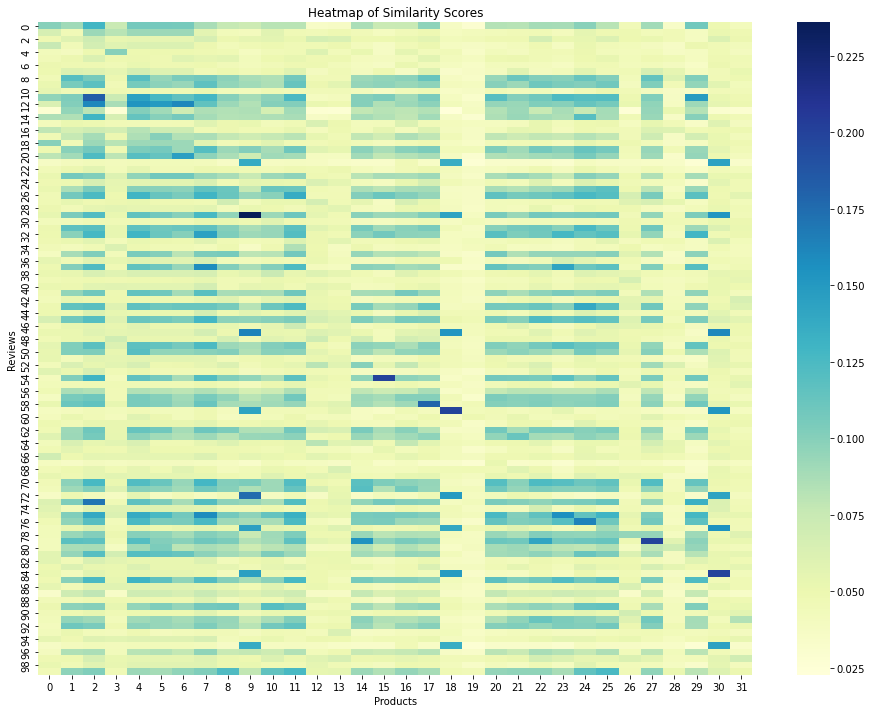

In [303]:
plt.figure(figsize = (16,12))
plt.imshow(np.sum([scores,np.negative(simple_scores)], axis = 0), cmap="YlGnBu", aspect='auto')
sns.heatmap(np.sum([scores,np.negative(simple_scores)], axis = 0), cmap="YlGnBu", annot=False)
plt.title("Heatmap of Similarity Scores")
plt.xlabel("Products")
plt.ylabel("Reviews")
plt.show()

#### brand/category matches

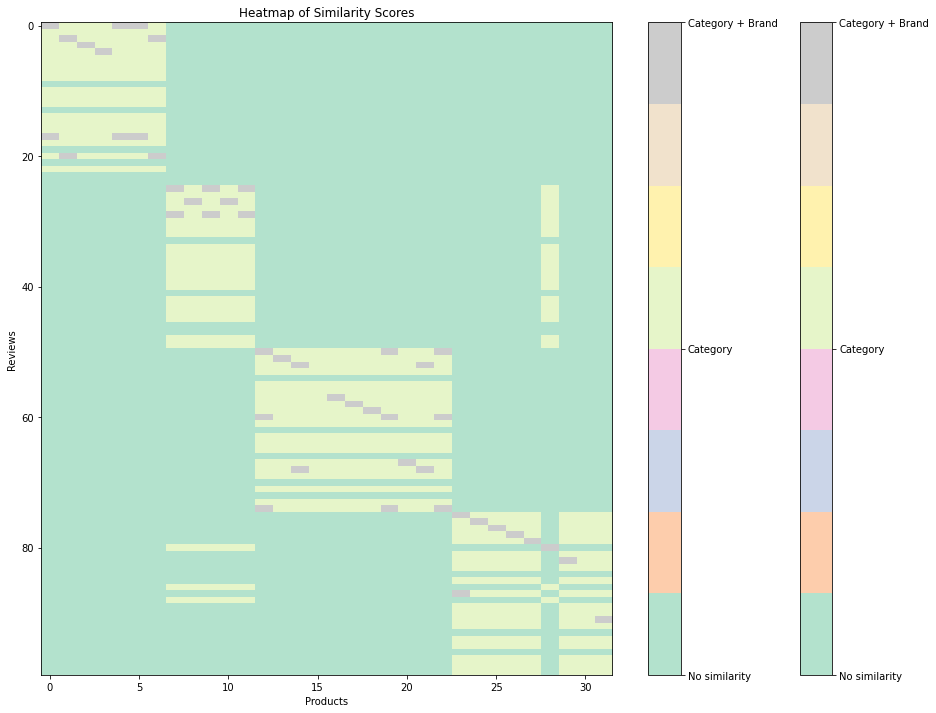

In [ ]:
plt.figure(figsize = (16,12))
simple_scores = np.array(simple_scores)
values=np.zeros(np.shape(simple_scores))
values[simple_scores==0.3] = 0
values[simple_scores==0.4] = 1
values[simple_scores==0.7] = 2
plt.imshow(values, cmap="Pastel2", aspect='auto')
# sns.heatmap(values, cmap="Pastel2", annot=False)
cbar = plt.colorbar(ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['No similarity', 'Category', 'Category + Brand'])
plt.title("Heatmap of Similarity Scores")
plt.xlabel("Products")
plt.ylabel("Reviews")
plt.show()

#### similarities including brand/category

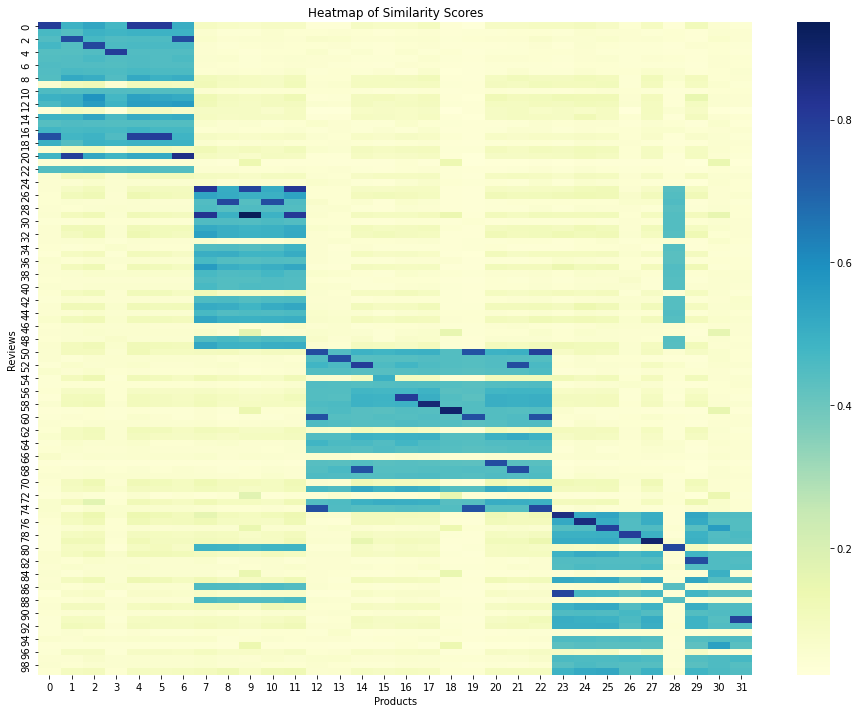

In [302]:
plt.figure(figsize = (16,12))
plt.imshow(scores, cmap="YlGnBu", aspect='auto')
sns.heatmap(scores, cmap="YlGnBu", annot=False)
plt.title("Heatmap of Similarity Scores")
plt.xlabel("Products")
plt.ylabel("Reviews")
plt.show()